This script takes project Grids, adds them to a DEM folder (reprojecting, converting to 32 bit float if not already).

Generates derivatives in indiv folders:
Hillshades (315,45) and Slope


Generates Mosaic datasets for DEM, and derivatives

@author: zengle
Modified by Blair, 10-7-22

#### USER INPUT

In [1]:
#User sets the variables in this cell
theProjectName = "testing" # this will be the output geodatabase prefix
theProjectFolder = r"C:\Users\lblair\Documents\Data\DeLong\Processing_scripts\tmp\testing" # folder where you want to output gdb
theProjectRasterFolder = r"C:\Users\lblair\Documents\Data\DeLong\Processing_scripts\grids" # subfolder or .gdb holding rasters (grds or tiffs or gdb rasters...)
theCoordinateSystem = "NAD 1983 UTM Zone 10N" # set coordinate spatial reference for project rasters... WGS 1984 UTM Zone 10N... for full list of options: http://pro.arcgis.com/en/pro-app/arcpy/classes/pdf/projected_coordinate_systems.pdf

In [2]:
### Ignore unless you don't wish to generate some or all derivatives
### Choose the derivative grids, be sure to use the exact names below
### 'Hillshade45','Hillshade315','Slope'
### If you don't want any derivates, set ListOfDerivatives = ['']
ListOfDerivatives = ['Hillshade45','Hillshade315','Slope']

#### Import Modules

In [3]:
### Import Modules
import os
#import shutil
import arcpy
from arcpy import env
from arcpy.ia import Render

#### Check out ArcGIS extensions

In [4]:
# Check out 3D Analyst and Spatial Analyst licenses
if arcpy.CheckExtension('Spatial') == 'Available':
    arcpy.CheckOutExtension('Spatial')
else:
    arcpy.AddMessage("Error: Couldn't get Spatial Analyst extension, exiting")
    sys.exit("No Spatial Analyst")

if arcpy.CheckExtension("3D") == 'Available':
    arcpy.CheckOutExtension("3D")
else:
    arcpy.AddMessage("Error: Couldn't get 3D Analyst extension, exiting")
    sys.exit("No 3D Analyst")

#### Set output names and paths

In [24]:
### set up new GDB name
out_dem_gdb_name = theProjectName + ".gdb"

### generate the project folder
if not os.path.isdir(theProjectFolder):
    os.mkdir(theProjectFolder)

### generate Subfolder for DEMs
theDEMFolder = os.path.join(theProjectFolder,"grds_DEM")
if not os.path.isdir(theDEMFolder):
    os.mkdir(theDEMFolder)

### generate Subfolder for Hillshade 45 derivate grids
if 'Hillshade45' in ListOfDerivatives:
    the45Folder = os.path.join(theProjectFolder,"grds_HillShd45")
    if not os.path.isdir(the45Folder):
        os.mkdir(the45Folder)
    
### generate Subfolder for Hillshade 315 derivate grids
if 'Hillshade315' in ListOfDerivatives:
    the315Folder = os.path.join(theProjectFolder,"grds_HillShd315")
    if not os.path.isdir(the315Folder):
        os.mkdir(the315Folder)
    
### generate Subfolder for Slope derivate grids
if 'Slope' in ListOfDerivatives:
    theSlpFolder = os.path.join(theProjectFolder,"grds_Slope")
    if not os.path.isdir(theSlpFolder):
        os.mkdir(theSlpFolder)

#### Set Environments

In [6]:
#environment sets defaults for output data
TheSR = arcpy.SpatialReference(theCoordinateSystem)
arcpy.env.outputCoordinateSystem = TheSR
arcpy.env.overwriteOutput = True #will overwrite

#### Generate Project GDB

In [7]:
#GDB saved in project folder
#getting strange xtools errors, BUT they don't kill the process

theOutGDB = arcpy.CreateFileGDB_management(theProjectFolder, out_dem_gdb_name).getOutput(0)


#### Copy project DEMS to dedicated DEM folder - with conversions

In [8]:
### iterate project rasters and save to DEM folder- environment will reproject, no pyramids (for speed)

#set workspace to project rasters
arcpy.env.workspace = theProjectRasterFolder

for grd in arcpy.ListRasters():
    print('Loading raster {}'.format(arcpy.Describe(grd).name))
    
    #generate the path and name
    theOutRas = os.path.join(theDEMFolder,arcpy.Describe(grd).name)
    print(theOutRas)

    arcpy.management.CopyRaster(
                                in_raster=grd,
                                out_rasterdataset=theOutRas,
                                config_keyword=None,
                                background_value=None,
                                nodata_value=None,
                                onebit_to_eightbit=None,
                                colormap_to_RGB=None,
                                pixel_type="32_BIT_FLOAT",
                                scale_pixel_value=None,
                                RGB_to_Colormap=None,
                                format='TIFF',
                                transform=None,
                                process_as_multidimensional=None,
                                build_multidimensional_transpose=None,
                                )

Loading raster USGS_NED_13_n37w121_IMG.img
C:\Users\lblair\Documents\Data\DeLong\Processing_scripts\tmp\testing\grds_DEM\USGS_NED_13_n37w121_IMG.img
Loading raster USGS_NED_13_n38w119_IMG.img
C:\Users\lblair\Documents\Data\DeLong\Processing_scripts\tmp\testing\grds_DEM\USGS_NED_13_n38w119_IMG.img
Loading raster USGS_NED_13_n38w120_IMG.img
C:\Users\lblair\Documents\Data\DeLong\Processing_scripts\tmp\testing\grds_DEM\USGS_NED_13_n38w120_IMG.img


#### Generate Derivates of the DEMS

In [9]:
### Now only draw from the new, formatted, DEMs
arcpy.env.workspace = theDEMFolder

In [10]:
# Generate hillshade-45 degree azimuth grids
if 'Hillshade45' in ListOfDerivatives:
    print("Generating Hillshade-45 rasters")
    print("saving to directory: {}".format(the45Folder))
    
    for dem in arcpy.ListRasters():
        outshd_name = arcpy.Describe(dem).baseName + "_shd45.tif"
        outraster_path = os.path.join(the45Folder,outshd_name)
        print("processing {0}".format(outshd_name))

        # Execute HillShade
        outHillshade = arcpy.sa.Hillshade(
                            in_raster = dem,
                            azimuth='45.0',
                            altitude='45.0',
                            model_shadows='#',
                            z_factor='#',
                            )

        # Save the output
        outHillshade.save(outraster_path)      

Generating Hillshade-45 rasters
saving to directory: C:\Users\lblair\Documents\Data\DeLong\Processing_scripts\tmp\testing\grds_HillShd45
processing USGS_NED_13_n37w121_IMG_shd45.tif
processing USGS_NED_13_n38w119_IMG_shd45.tif
processing USGS_NED_13_n38w120_IMG_shd45.tif


In [11]:
# Generate hillshade-315 degree azimuth grids
if 'Hillshade315' in ListOfDerivatives:
    print("Generating Hillshade-315 rasters...")
    print("saving to directory: {}".format(the315Folder))
    for dem in arcpy.ListRasters():
        outshd_name = arcpy.Describe(dem).baseName + "_shd315.tif"
        outraster_path = os.path.join(the315Folder,outshd_name)
        print("processing {0}".format(outshd_name))

        # Execute HillShade
        outHillshade = arcpy.sa.Hillshade(
                            in_raster = dem,
                            azimuth='315.0',
                            altitude='45.0',
                            model_shadows='#',
                            z_factor='#',
                            )

        # Save the output
        outHillshade.save(outraster_path)      

Generating Hillshade-315 rasters...
saving to directory: C:\Users\lblair\Documents\Data\DeLong\Processing_scripts\tmp\testing\grds_HillShd315
processing USGS_NED_13_n37w121_IMG_shd315.tif
processing USGS_NED_13_n38w119_IMG_shd315.tif
processing USGS_NED_13_n38w120_IMG_shd315.tif


In [12]:
# Generate slope grids - in degrees
if 'Slope' in ListOfDerivatives:
    print("Generating slope rasters...")
    print("saving to directory: {}".format(theSlpFolder))
    for dem in arcpy.ListRasters():
        outslp_name = arcpy.Describe(dem).baseName + "_slp_deg.tif"
        outraster_path = os.path.join(theSlpFolder,outslp_name)
        print("processing {0}".format(outslp_name))

        # Execute Slope
        outSlope = arcpy.sa.Slope(
                                in_raster = dem,
                                output_measurement='DEGREE',
                                z_factor='#',
                                method='#',
                                z_unit='#',
                                )

        # Save the output
        outSlope.save(outraster_path)

Generating slope rasters...
saving to directory: C:\Users\lblair\Documents\Data\DeLong\Processing_scripts\tmp\testing\grds_Slope
processing USGS_NED_13_n37w121_IMG_slp_deg.tif
processing USGS_NED_13_n38w119_IMG_slp_deg.tif
processing USGS_NED_13_n38w120_IMG_slp_deg.tif


#### Generate and populate Mosaic Datasets for Derivatives

In [27]:
#generate an empty mosaic dataset for DEMS
print("Creating and populating DEM Mosaic Dataset in the project GDB")
TheDEM_Mosaic = arcpy.management.CreateMosaicDataset(
                                                    in_workspace=theOutGDB,
                                                    in_mosaicdataset_name=theProjectName + '_DEM_Mosaic',
                                                    coordinate_system=TheSR,
                                                    num_bands="1",
                                                    pixel_type="32_BIT_FLOAT",
                                                    product_definition=None,
                                                    product_band_definitions=None,
                                                    ).getOutput(0)
display(TheDEM_Mosaic)

#populate the MD from grids
TheDEM_AddR_output = arcpy.AddRastersToMosaicDataset_management(
                                            in_mosaic_dataset=TheDEM_Mosaic,
                                            raster_type="Raster Dataset",
                                            input_path=theDEMFolder,
                                            update_cellsize_ranges=None,
                                            update_boundary=None,
                                            update_overviews="UPDATE_OVERVIEWS",
                                            maximum_pyramid_levels=None,
                                            maximum_cell_size=None,
                                            minimum_dimension=None,
                                            spatial_reference=None,
                                            filter=None,
                                            sub_folder=None,
                                            duplicate_items_action=None,
                                            build_pyramids="BUILD_PYRAMIDS",
                                            calculate_statistics=None,
                                            build_thumbnails=None,
                                            operation_description=None,
                                            force_spatial_reference=None,
                                            estimate_statistics="ESTIMATE_STATISTICS",
                                            aux_inputs=None,
                                            enable_pixel_cache=None,
                                            cache_location=None,
                                            )

Creating and populating DEM Mosaic Dataset in the project GDB


'C:\\Users\\lblair\\Documents\\Data\\DeLong\\Processing_scripts\\tmp\\testing\\testing.gdb\\testing_DEM_Mosaic'

In [38]:
### To view the output messages from the add rasters processes
#TheDEM_AddR_output

'C:\\Users\\lblair\\Documents\\Data\\DeLong\\Processing_scripts\\tmp\\testing\\testing.gdb\\testing_DEM_Mosaic'

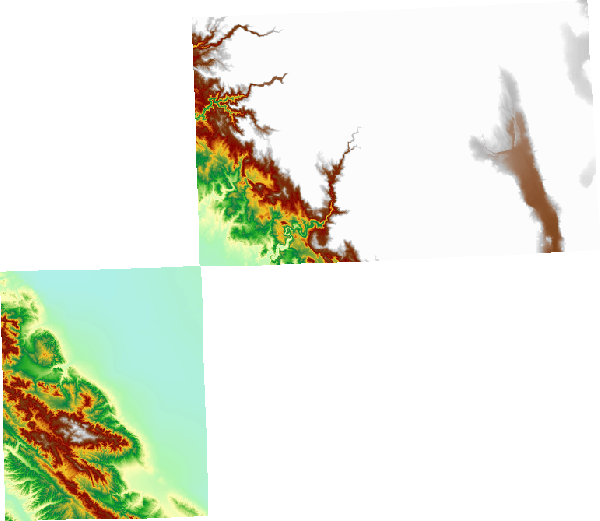

In [30]:
### To view the above MD
Render(TheDEM_Mosaic, colormap='Elevation #1')

In [32]:
#generate an empty mosaic dataset for Hillshades 45
if 'Hillshade45' in ListOfDerivatives:
    print("Creating and populating Hillshade45 Mosaic Dataset in the project GDB")
    TheShd45_Mosaic = arcpy.management.CreateMosaicDataset(
                                                        in_workspace=theOutGDB,
                                                        in_mosaicdataset_name=theProjectName + '_shd45_Mosaic',
                                                        coordinate_system=TheSR,
                                                        num_bands="1",
                                                        pixel_type="8_BIT_UNSIGNED",
                                                        product_definition=None,
                                                        product_band_definitions=None,
                                                        ).getOutput(0)
    display(TheShd45_Mosaic)

    #populate the MD from grids
    TheDEM_Add45_output = arcpy.management.AddRastersToMosaicDataset(
                                                in_mosaic_dataset=TheShd45_Mosaic,
                                                raster_type="Raster Dataset",
                                                input_path=the45Folder,
                                                update_cellsize_ranges="UPDATE_CELL_SIZES",
                                                update_boundary="UPDATE_BOUNDARY",
                                                update_overviews="UPDATE_OVERVIEWS",
                                                maximum_pyramid_levels=None,
                                                maximum_cell_size=None,
                                                minimum_dimension=None,
                                                spatial_reference=TheSR,
                                                filter=None,
                                                sub_folder="SUBFOLDERS",
                                                duplicate_items_action=None,
                                                build_pyramids="BUILD_PYRAMIDS",
                                                calculate_statistics="CALCULATE_STATISTICS",
                                                build_thumbnails=None,
                                                operation_description=None,
                                                force_spatial_reference=None,
                                                estimate_statistics="ESTIMATE_STATISTICS",
                                                aux_inputs=None,
                                                enable_pixel_cache=None,
                                                cache_location=None,
                                                )

Creating and populating Hillshade45 Mosaic Dataset in the project GDB


'C:\\Users\\lblair\\Documents\\Data\\DeLong\\Processing_scripts\\tmp\\testing\\testing.gdb\\testing_shd45_Mosaic'

In [34]:
### To view the output messages from the add rasters processes
#TheDEM_Add45_output

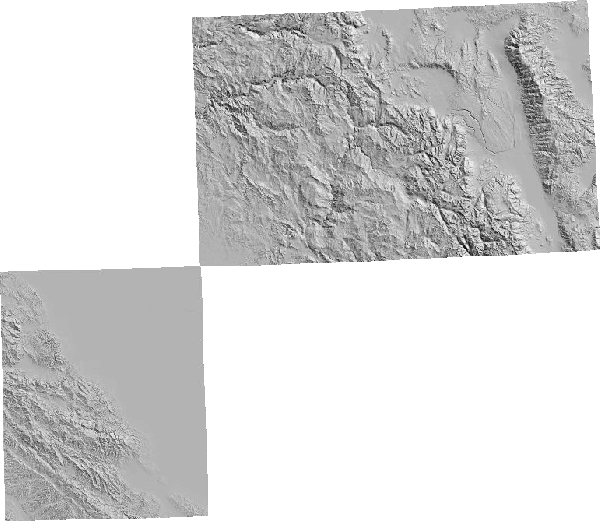

In [23]:
### To view the above MD
Render(TheShd45_Mosaic, rendering_rule = {'min': 0, 'max': 255}, colormap=  'Gray')

In [17]:
#generate an empty mosaic dataset for Hillshades 315
if 'Hillshade315' in ListOfDerivatives:
    print("Creating and populating Hillshade315 Mosaic Dataset in the project GDB")
    TheShd315_Mosaic = arcpy.management.CreateMosaicDataset(
                                                        in_workspace=theOutGDB,
                                                        in_mosaicdataset_name=theProjectName + '_shd315_Mosaic',
                                                        coordinate_system=TheSR,
                                                        num_bands="1",
                                                        pixel_type="8_BIT_UNSIGNED",
                                                        product_definition=None,
                                                        product_band_definitions=None,
                                                        ).getOutput(0)
    display(TheShd315_Mosaic)
    
    #populate the MD from grids
    TheDEM_Add315_output = arcpy.management.AddRastersToMosaicDataset(
                                                in_mosaic_dataset=TheShd315_Mosaic,
                                                raster_type="Raster Dataset",
                                                input_path=the315Folder,
                                                update_cellsize_ranges="UPDATE_CELL_SIZES",
                                                update_boundary="UPDATE_BOUNDARY",
                                                update_overviews="UPDATE_OVERVIEWS",
                                                maximum_pyramid_levels=None,
                                                maximum_cell_size=None,
                                                minimum_dimension=None,
                                                spatial_reference=TheSR,
                                                filter=None,
                                                sub_folder="SUBFOLDERS",
                                                duplicate_items_action=None,
                                                build_pyramids="BUILD_PYRAMIDS",
                                                calculate_statistics="CALCULATE_STATISTICS",
                                                build_thumbnails=None,
                                                operation_description=None,
                                                force_spatial_reference=None,
                                                estimate_statistics="ESTIMATE_STATISTICS",
                                                aux_inputs=None,
                                                enable_pixel_cache=None,
                                                cache_location=None,
                                                )

Creating and populating Hillshade315 Mosaic Dataset in the project GDB


'C:\\Users\\lblair\\Documents\\Data\\DeLong\\Processing_scripts\\tmp\\testing\\testing.gdb\\testing_shd315_Mosaic'

In [ ]:
### To view the output messages from the add rasters processes
#TheDEM_Add315_output

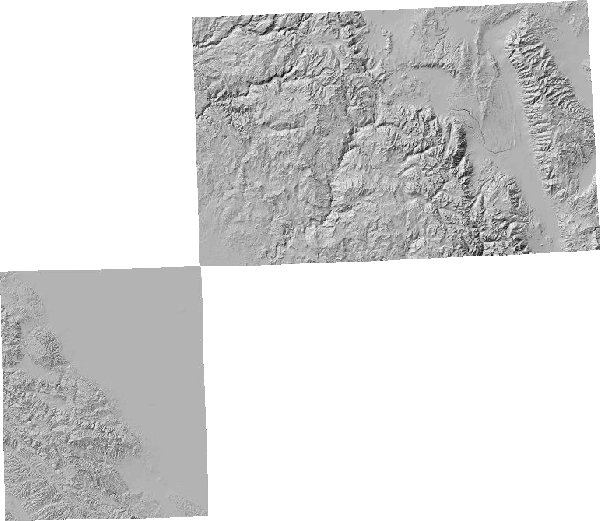

In [21]:
### To view the above MD
Render(TheShd315_Mosaic, rendering_rule = {'min': 0, 'max': 255}, colormap=  'Gray')

In [19]:
#generate an empty mosaic dataset for Slope
if 'Slope' in ListOfDerivatives:
    print("Creating and populating Slope Mosaic Dataset in the project GDB")
    TheSlp_Mosaic = arcpy.management.CreateMosaicDataset(
                                                        in_workspace=theOutGDB,
                                                        in_mosaicdataset_name=theProjectName + '_slope_Mosaic',
                                                        coordinate_system=TheSR,
                                                        num_bands="1",
                                                        pixel_type="8_BIT_UNSIGNED",
                                                        product_definition=None,
                                                        product_band_definitions=None,
                                                        ).getOutput(0)
    display(TheSlp_Mosaic)
    
    #populate the MD from grids
    TheDEM_AddSlp_output = arcpy.management.AddRastersToMosaicDataset(
                                                in_mosaic_dataset=TheSlp_Mosaic,
                                                raster_type="Raster Dataset",
                                                input_path=theSlpFolder,
                                                update_cellsize_ranges="UPDATE_CELL_SIZES",
                                                update_boundary="UPDATE_BOUNDARY",
                                                update_overviews="UPDATE_OVERVIEWS",
                                                maximum_pyramid_levels=None,
                                                maximum_cell_size=None,
                                                minimum_dimension=None,
                                                spatial_reference=TheSR,
                                                filter=None,
                                                sub_folder="SUBFOLDERS",
                                                duplicate_items_action=None,
                                                build_pyramids="BUILD_PYRAMIDS",
                                                calculate_statistics="CALCULATE_STATISTICS",
                                                build_thumbnails=None,
                                                operation_description=None,
                                                force_spatial_reference=None,
                                                estimate_statistics="ESTIMATE_STATISTICS",
                                                aux_inputs=None,
                                                enable_pixel_cache=None,
                                                cache_location=None,
                                                )

Creating and populating Slope Mosaic Dataset in the project GDB


'C:\\Users\\lblair\\Documents\\Data\\DeLong\\Processing_scripts\\tmp\\testing\\testing.gdb\\testing_slope_Mosaic'

In [ ]:
### To view the output messages from the add rasters processes
#TheDEM_AddSlp_output

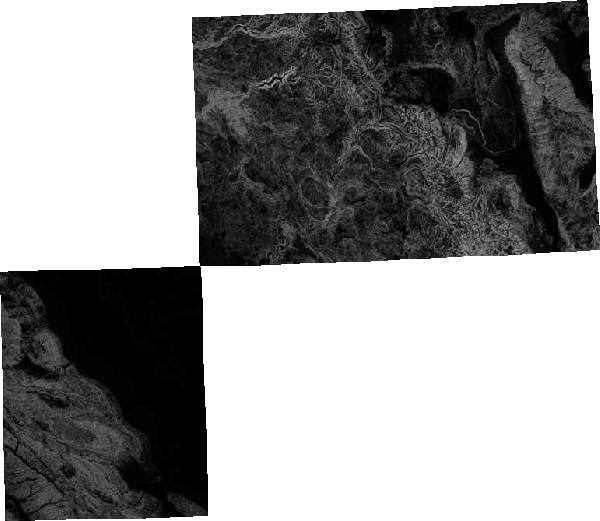

In [22]:
### To view the above MD
Render(TheSlp_Mosaic, rendering_rule = {'min': 0, 'max': 90}, colormap=  'Gray')